In [ ]:
# Umar Hassan Khan - 288929
# Advanced Topics in Computing (Computer Vision)
# Assignment 1 Canny Edge Detector


In [ ]:
# importing libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

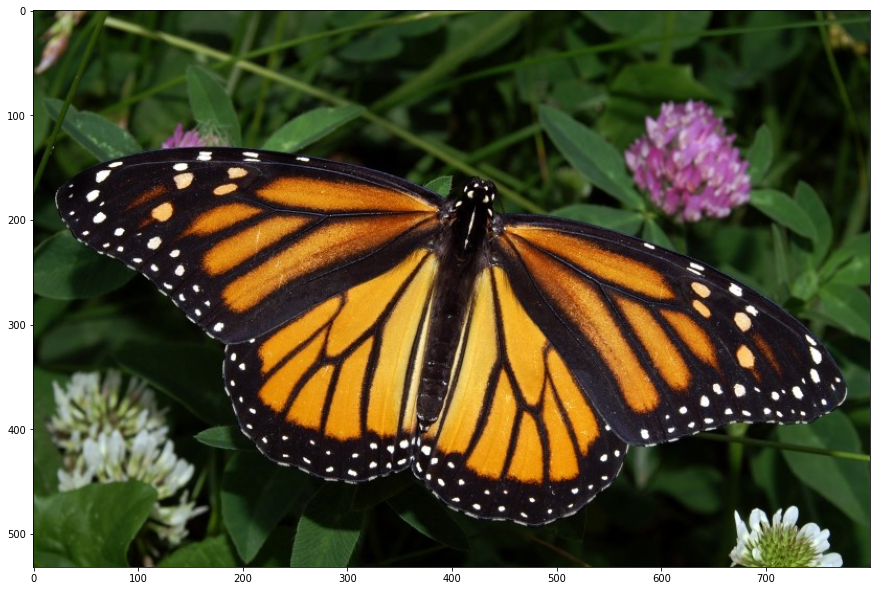

In [ ]:
# loading image , change file name here to run canny edge detection on an image.
img = Image.open("image3.jpg")

# showing original image
plt.figure(figsize=(15,15))
plt.imshow(img, cmap='gray')
plt.show()


# loading as grayscale
img_gray = img.convert('L')

# converting into numpy array
numpy_img = np.array(img_gray)

# 5*5 kernel for guassian
kernel = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
                   ]) *(1/256)

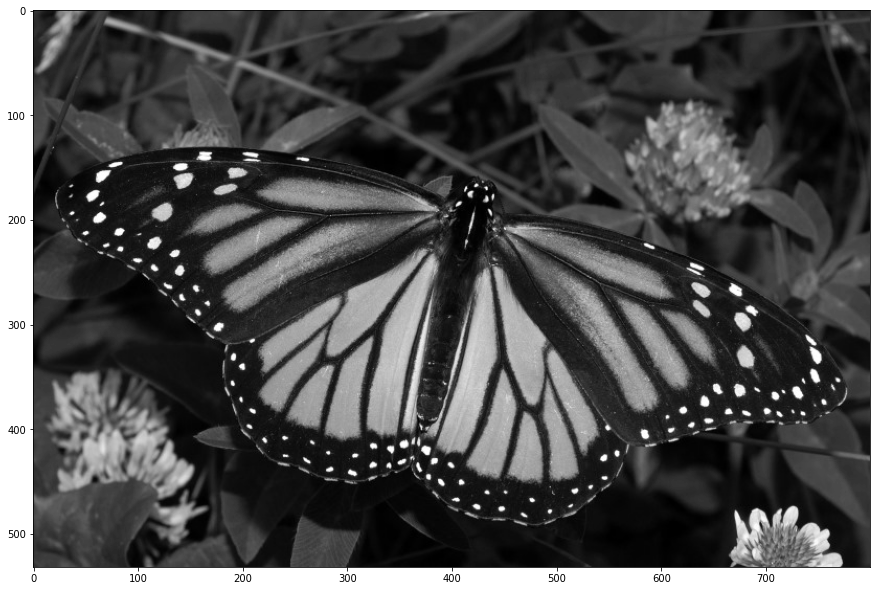

In [ ]:
# showing original image
plt.figure(figsize=(15,15))
plt.imshow(img_gray, cmap='gray')
plt.show()

In [ ]:
# step 1
# image smoothing function
def guassian_blur(img, filters, stride = 1):
    x, y = img.shape
    filter_x, filter_y = filters.shape

    out_x = (x - filter_x) // stride + 1
    out_y = (y - filter_y) // stride + 1

    in_img = img
    out = np.zeros((out_x, out_y))

    for x in range(out_x):
        x_start = x * stride
        x_end = x_start + filter_x
        for y in range(out_y):
            y_start = y * stride
            y_end = y_start + filter_y

            out[x, y] = np.sum(in_img[x_start:x_end, y_start:y_end] * filters)
    return out


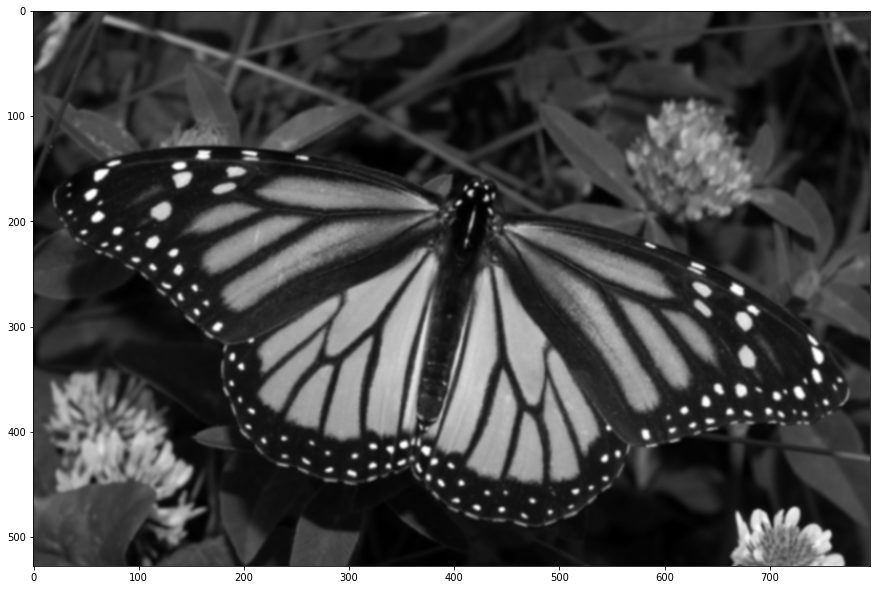

In [ ]:
# smooth image
smoothed_img = guassian_blur(numpy_img, kernel, 1)

# display image
plt.figure(figsize=(15,15))
plt.imshow(smoothed_img, cmap='gray')
plt.show()

In [ ]:

# step 2
# sobel filter
def sobel_filters(img):
    Gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Gy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)

    Ix = guassian_blur(img, Gx, 1) # dx
    Iy = guassian_blur(img, Gy, 1) # dy

    # gradient magnitude calculation
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255

    # direction of gradient
    theta = np.arctan2(Iy, Ix)

    return (G, theta)



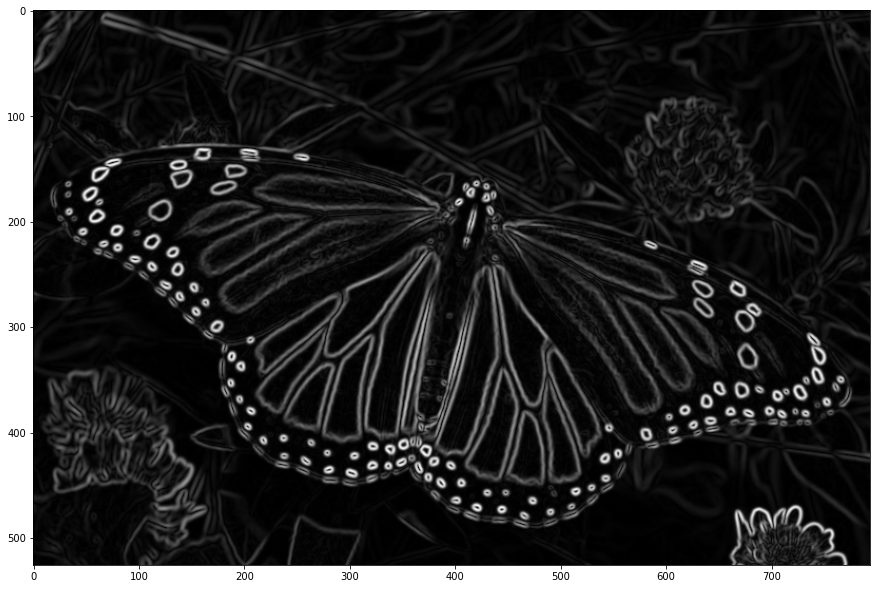

In [ ]:
# gradient and its direction
gradient_matrix, theta_matrix = sobel_filters(smoothed_img)

# display gradient image
plt.figure(figsize=(15,15))
plt.imshow(gradient_matrix, cmap='gray')
plt.show()

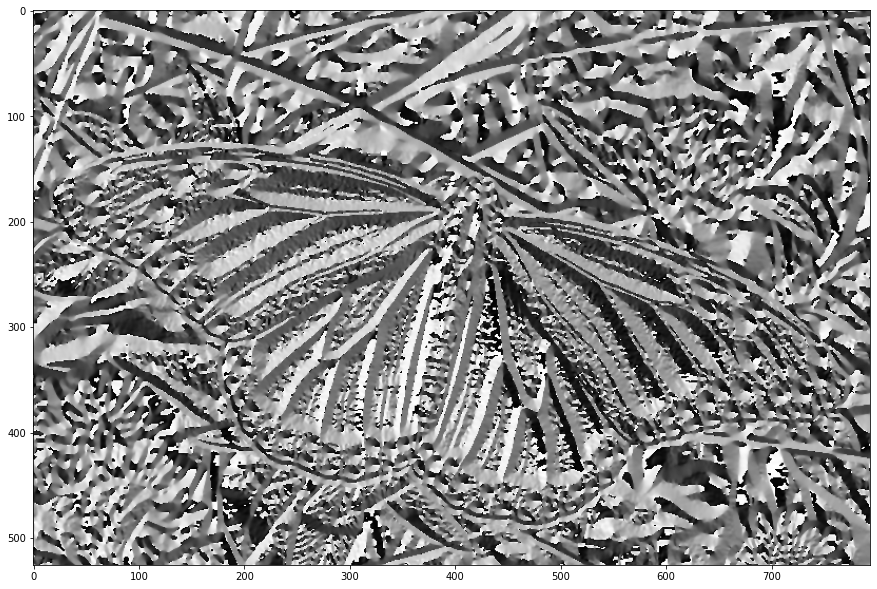

In [ ]:
# display direction of gradient image
plt.figure(figsize=(15,15))
plt.imshow(theta_matrix, cmap='gray')
plt.show()

In [ ]:

# step 3
# non maximum supression
def non_maximum_suppression(img, theta):
    # input coordinates
    x, y = img.shape
    # output array
    out = np.zeros((x, y), dtype=np.int32)
    # radians to degrees
    angle = theta * 180. / np.pi
    angle[angle < 0] += 180
    # checks angle and sets values depending on neighbours
    for i in range(1, x-1):
        for j in range(1, y-1):
            a = 255
            b = 255
            # 0 degree angle
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                a = img[i, j+1]
                b = img[i, j-1]
            # 45 degree angle
            elif (22.5 <= angle[i, j] < 67.5):
                a = img[i+1, j-1]
                b = img[i-1, j+1]
            # 90 degree angle
            elif (67.5 <= angle[i, j] < 112.5):
                a = img[i+1, j]
                b = img[i-1, j]
            # 135 degree angle
            elif (112.5 <= angle[i, j] < 157.5):
                a = img[i-1, j-1]
                b = img[i+1, j+1]
            if (img[i,j] >= a) and (img[i,j] >= b):
                out[i,j] = img[i,j]
            else:
                out[i,j] = 0

    return out

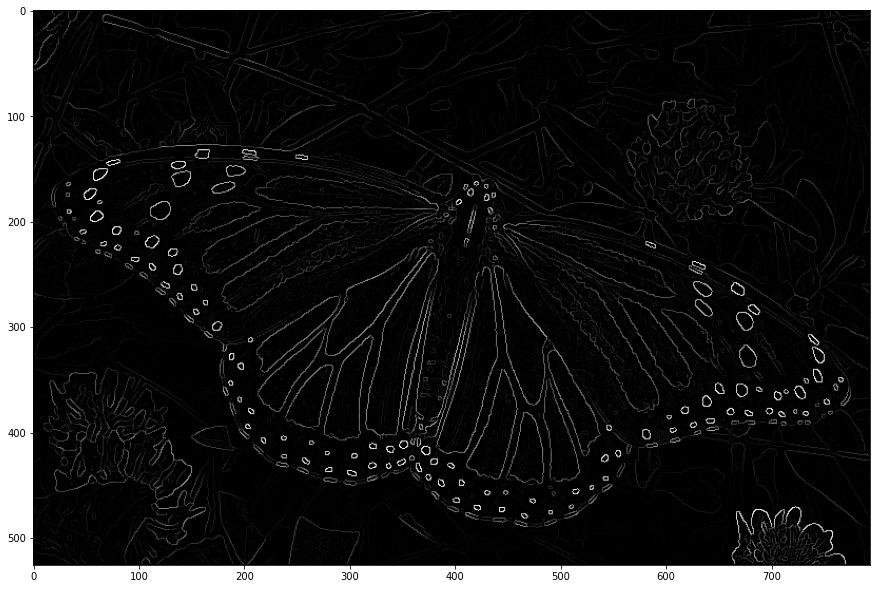

In [ ]:
# applying non maximum supression
non_max_img = non_maximum_suppression(gradient_matrix, theta_matrix)

# display image
plt.figure(figsize=(15,15))
plt.imshow(non_max_img, cmap='gray')
plt.show()

In [ ]:

# step 4
# hysteresis thresholding

def hysteresis_thresh(img, l_threshold_ratio=0.01, h_threshold_ratio=0.15):

    # high and low thresholds
    h_threshold = img.max() * h_threshold_ratio
    l_threshold = h_threshold * l_threshold_ratio

    x1, y1 = img.shape
    thresh = np.zeros((x1, y1), dtype=np.int32)

    weak = np.int32(25)
    strong = np.int32(255)

    strong_i, strong_j = np.where(img >= h_threshold)
    zeros_i, zeros_j = np.where(img < l_threshold)

    weak_i, weak_j = np.where((img <= h_threshold) & (img >= l_threshold))

    thresh[strong_i, strong_j] = strong
    thresh[weak_i, weak_j] = weak

    x2, y2 = thresh.shape

    for i in range(1, x2-1):
        for j in range(1, y2-1):
            if (thresh[i, j] == weak):

                if ((thresh[i+1, j-1] == strong) or (thresh[i+1, j] == strong) or (thresh[i+1, j+1] == strong)
                    or (thresh[i, j-1] == strong) or (thresh[i, j+1] == strong)
                    or (thresh[i-1, j-1] == strong) or (thresh[i-1, j] == strong) or (thresh[i-1, j+1] == strong)):
                    thresh[i, j] = strong
                else:
                    thresh[i, j] = 0
    return thresh

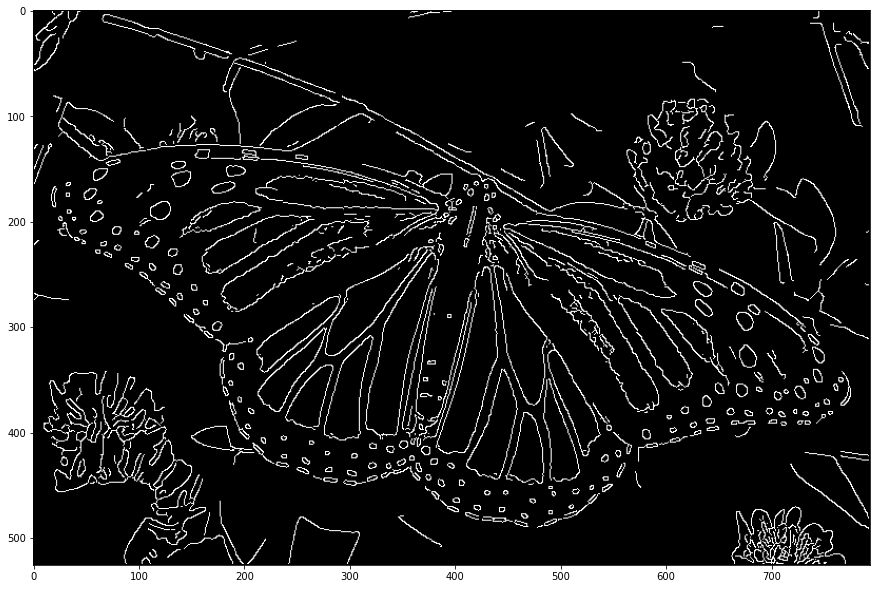

In [ ]:
# applying hysteresis thresholding
img_final = hysteresis_thresh(non_max_img)
result=Image.fromarray(img_final)

# display image
plt.figure(figsize=(15,15))
plt.imshow(result, cmap='gray')
plt.show()